In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = datasets.load_iris()

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


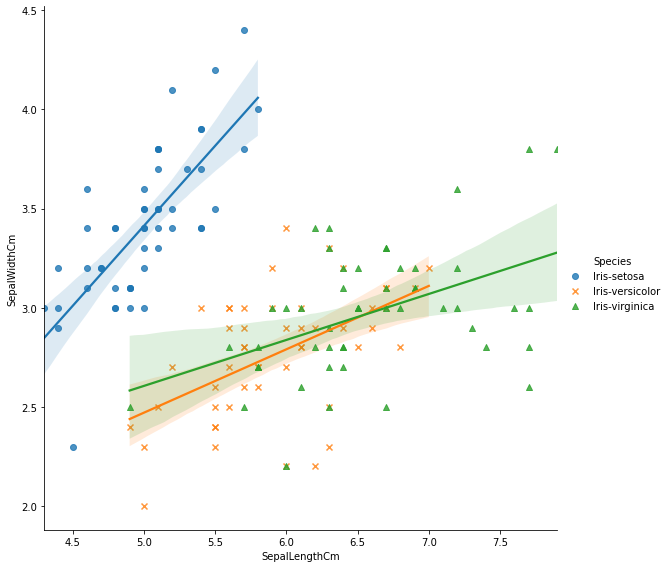

In [ ]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, height=8, markers=["o", "x", "^"])


In [ ]:
y= df["Species"]
x= df.drop("Species",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state= 42)

In [ ]:
dt = DecisionTreeClassifier(random_state = 43)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [ ]:
mod_dt = tree.DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
predicted=mod_dt.predict(x_test)

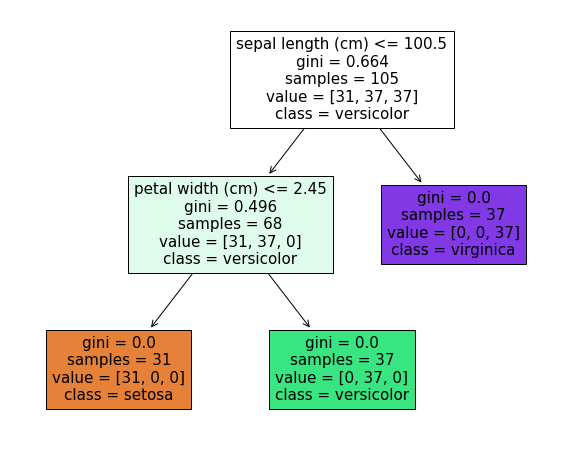

In [ ]:
plt.figure(figsize = (10,8))
tree.plot_tree(mod_dt, feature_names = iris.feature_names, class_names = iris.target_names, filled = True);


In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
y_actual = pd.DataFrame(y_test.value_counts())
y_actual = y_actual.reset_index()
y_actual.columns = ['Condition', 'AcutalCnt']

y_predicted = pd.DataFrame(y_pred, columns=["Predicted"])["Predicted"]
y_predicted = pd.DataFrame(y_predicted.value_counts())
y_predicted = y_predicted.reset_index()
y_predicted.columns = ["Condition","PredictCnt"]
y_predicted

confusion_df = pd.merge(y_actual, y_predicted, on='Condition', how='outer')
confusion_df['Error'] = abs(confusion_df['AcutalCnt']-confusion_df['PredictCnt'])
confusion_df
accuracy = (confusion_df.AcutalCnt.sum()-confusion_df.Error.sum())/confusion_df.AcutalCnt.sum()*100
print(confusion_df)
print("Model Accuracy is", accuracy)

         Condition  AcutalCnt  PredictCnt  Error
0      Iris-setosa         19          19      0
1   Iris-virginica         13          13      0
2  Iris-versicolor         13          13      0
Model Accuracy is 100.0


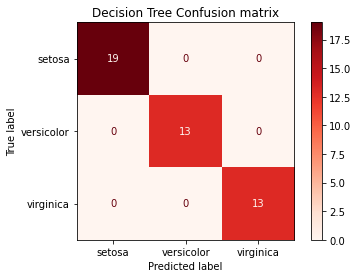

In [ ]:
disp = metrics.plot_confusion_matrix(mod_dt, x_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Reds,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix');